#M.Tech тестовое задание на вакансию стажера Data science

Формулировка задания:

 Руководство компании обратило внимание на то, что сотрудники старше 35
лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин
количество пропусков рабочих дней в связи с больничным выше, чем среди женщин.
В связи с этой ситуацией, руководство организации планирует ввести
дополнительные медицинские осмотры среди групп риска.
Вам необходимо проверить следующие гипотезы:


1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по
болезни значимо чаще женщин.


2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих
дней (work_days) по болезни значимо чаще своих более молодых коллег.

##Изучаем пролученнные данные

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [4]:
data = pd.read_csv("stats.csv")
data.columns = ['Количество больничных дней', 'Возраст', 'Пол']
data.sample(5)

,Количество больничных дней,Возраст,Пол
9,4,36,М
216,3,50,М
148,4,43,Ж
69,5,32,М
128,2,43,М


In [5]:
data.dtypes

Количество больничных дней     int64
Возраст                        int64
Пол                           object
dtype: object

In [6]:
data.describe()

,Количество больничных дней,Возраст
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


#### Приступим к рассмотрению 1 гипотезы: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

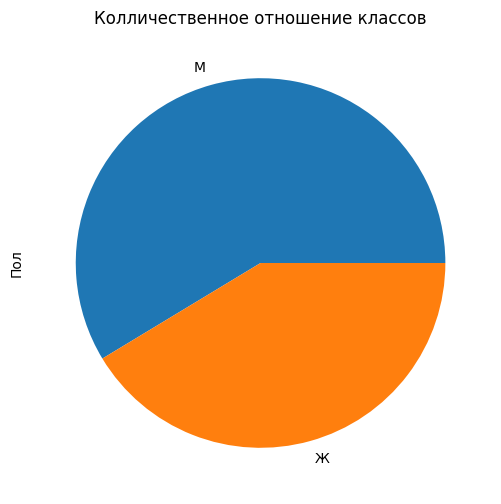

In [8]:
plt.figure(figsize=(8, 6))
data['Пол'].value_counts().plot.pie()
plt.title('Колличественное отношение классов')
plt.show()

In [9]:
M = data[data['Пол'] == 'М']['Количество больничных дней']
W = data[data['Пол'] == 'Ж']['Количество больничных дней']

M.name = 'Мужчины'
W.name = 'Женщины'

###Проводим тест Шапиро-Уилка

In [13]:
res = stats.shapiro(M)
print('p-value:', res[1])

res = stats.shapiro(W)
print('p-value:', res[1])

p-value: 1.3017996025155298e-05
p-value: 0.000837339146528393


In [15]:
def two_hist(x: pd.DataFrame, y: pd.DataFrame, name: str):
  """
  Функция выводит 2 гистограммы на одной фигуре.
  x - данные для 1 гист.
  y - данные для 2 гист.
  name - по какому признаку разделены данные. Выводится в titile.
  """
  plt.figure(figsize=(8, 6))
  x.plot.hist(alpha=0.5, bins=9)
  y.plot.hist(alpha=0.5, bins=9)
  plt.axvline(x.mean(), color='blue', linestyle='dashed')
  plt.axvline(y.mean(), color='red', linestyle='dashed')
  plt.ylabel('Сотрудников')
  plt.title(f'Распределение пропущенных дней по {name} категориально')
  plt.legend([x.name, y.name, f'Среднее бол. д. {x.name}', f'Среднее бол. д. {y.name}'])
  plt.show()


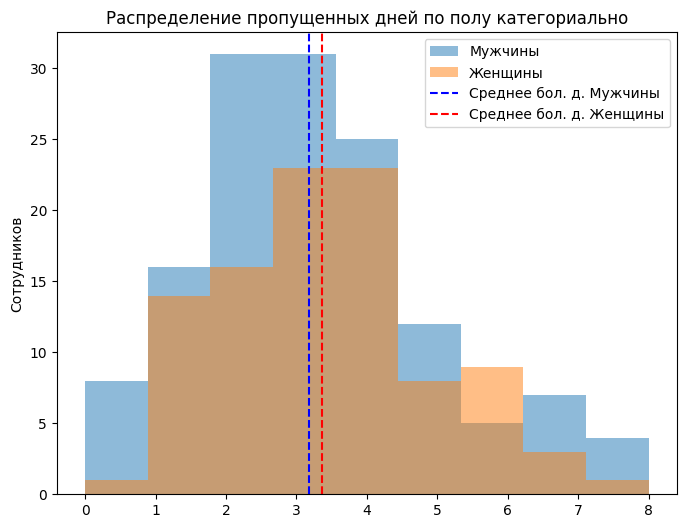

In [16]:
two_hist(M, W, 'полу')

Однако рапредление не сильно отличное от нормального

###Проверим равенство дисперсии генеральных совокупностей



In [17]:
res = stats.fligner(M, W)
print('p-value:', res[1])

p-value: 0.521300054528677


Мы можем утверждать что дисперсиии равны

In [18]:
res = stats.ttest_ind(M, W)
print('p-value:', res[1])

p-value: 0.4328754720595044


###Проведем t-тестирование.

##### Произведем сравнение средних по T-критерию

Так как выборки независимы:

1 выборка - мужчины, 2 выборка - женщины.

Выборки: $X_{11}, ... , X_{1N1} \sim N(\mu_{1}, \sigma_{1}), X_{21}, ... , X_{2N2} \sim N(\mu_{2}, \sigma_{2}),  
 \sigma_{1}, \sigma_{2}$ - не известны

Пусть, мат. ожидание первой выборки - это $μ_{1}$, а мат. ожидание второй выборки - это $μ_{2}$.

Выдвинем нулевую гипотезу: $μ_{1} \le μ_{2}$

Соответственно, альтернативная гипотеза: $μ_{1}$ > $μ_{2}$

Статистика $T_{N}$: $$T_{N}=\frac{\overline{X_{1}}-\overline{X_{2}}}{\sqrt{\frac{S_{1}^{2}}{N_{1}}-\frac{S_{2}^{2}}{N_{2}}}}$$

Нулевое распределение: $Т_{N} \sim St(v))$

In [35]:
t_statistic, p_value = stats.ttest_ind(
    data[(data['Пол'] == 'М') & (data['Количество больничных дней'] > 2)]['Количество больничных дней'],
    data[(data['Пол'] == 'Ж') & (data['Количество больничных дней'] > 2)]['Количество больничных дней'],
    alternative='less'
)

print('Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
p-value: 0.660968339483585
statistic: 0.41592499748510986


По p-value можно судить о том, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу.

Исходя из этих результатов, мы не можем сделать вывод, что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

### Приступим к рассмотрению 2 гипотезы: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

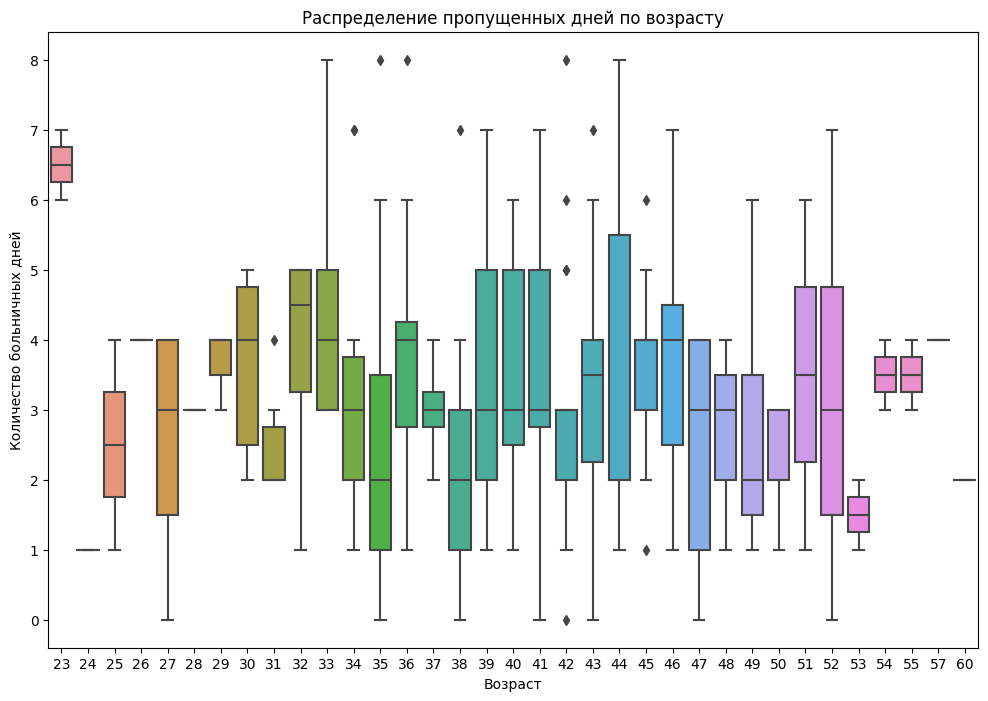

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Возраст', y='Количество больничных дней', data=data)
plt.title('Распределение пропущенных дней по возрасту')
plt.show()

In [24]:
# Разделим данные на подвыборки по трешхолду
Aged = data[data['Возраст'] > 36]['Количество больничных дней']
Young = data[data['Возраст'] <= 36]['Количество больничных дней']

Aged.name = 'В возрасте'
Young.name = 'Молодые'

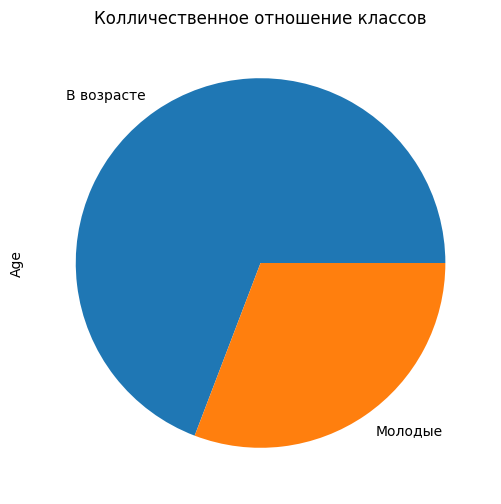

In [28]:
plt.figure(figsize=(8, 6))
pd.Series([Aged.size, Young.size], index = [Aged.name, Young.name], name='Age').plot.pie()
plt.title('Колличественное отношение классов')
plt.show()

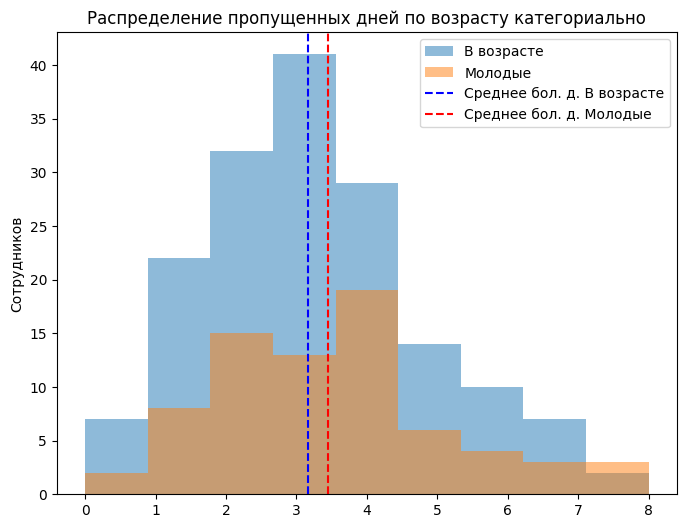

In [29]:
two_hist(Aged, Young, 'возрасту')

###Проверим равенство дисперсии генеральных совокупностей

In [33]:
res = stats.fligner(Aged, Young)
print('p-value:', res[1])

p-value: 0.5587994562254046


Мы можем утверждать что дисперсиии равны

Произведем сравнение средних по T-критерию, как в прошлом случае:

Выдвинем нулевую гипотезу: $μ_{1} \le μ_{2}$

Соответственно, альтернативная гипотеза: $μ_{1}$ > $μ_{2}$

In [36]:
t_statistic, p_value = stats.ttest_ind(
    Aged[Aged > 2],
    Young[Young > 2],
    alternative='less'
)

print('Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
p-value: 0.15654372046208234
statistic: -1.0121913245936964


Полученное значение p-value означает, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу.
Исходя из этих результатов, мы не можем сделать вывод, что работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
Мы не имеем статистически значимых доказательств в пользу этой альтернативной гипотезы.